#**Python Code Implementation of t-SNE on MNIST Dataset**


#Step 1 :
##Importing Necessary Modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


# Step 2 :
## load the MNIST_test dataset into pandas dataframe

In [2]:
df = pd.read_csv('mnist_train.csv')

print(df.head(5))



   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0  0.0  0.0  0.0  ...    0.0    0.0   
1      0    0    0    0    0    0    0  0.0  0.0  0.0  ...    0.0    0.0   
2      4    0    0    0    0    0    0  0.0  0.0  0.0  ...    0.0    0.0   
3      1    0    0    0    0    0    0  0.0  0.0  0.0  ...    0.0    0.0   
4      9    0    0    0    0    0    0  0.0  0.0  0.0  ...    0.0    0.0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]


In [3]:

d = df.drop("label", axis=1)


# Step 3  :
## Standardize the data

In [5]:
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(4594, 784)


# Step 4 :  Reduce the columns data to 2 dimensions




In [6]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = standardized_data[0:1000, :]
data_1000.shape

(1000, 784)

In [8]:
labels = df['label']
labels_1000 = labels[0:1000]
labels_1000.shape

(1000,)

# Step 5 :
## define the model

In [10]:
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(data_1000)

# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000


# Step 6 :
## Fit the model

In [11]:

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))



# Step 7 :
##  Plotting the result

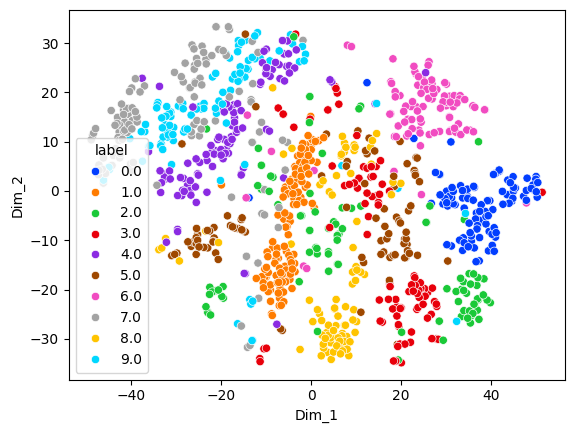

In [12]:
# Plotting the result of tsne

import seaborn as sn
import matplotlib.pyplot as plt
sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()

#**Well Done**